In [1]:
# start with the libraries
# get environment information

import sys
print(sys.version)
print(sys.executable)

3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
//anaconda3/envs/timeseries36/bin/python


In [2]:
# import the base libraries
# standard libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os
import math
from itertools import cycle
import datetime

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to visualize all of the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

print(os.getcwd())

/Users/bryanbutler/Documents/Python/Forecasting/EWS


In [3]:
# import all of the stats functions to be used

import timeseries_module as ts

In [4]:
wdf = pd.read_csv('ews_weekly_series.csv',index_col='date_ride', parse_dates = True)
wdf.head()

,holiday,gross_rides,verified_paid_rides,verified_paid_costs,verified_paid_miles,verified_paid_ambulatory_rides,verified_paid_ambulatory_costs,verified_paid_stretcher_rides,verified_paid_stretcher_costs,verified_paid_wheelchair_rides,verified_paid_wheelchair_costs,riders,cpm
date_ride,,,,,,,,,,,,,
2014-01-05,1,339193,151170,"3,657,245.83",1858376,276999,"2,521,979.56",7172,"267,237.82",55022,"868,028.45",167247,1.97
2014-01-12,0,716978,417251,"10,218,253.61",5160147,594478,"7,425,178.64",13331,"611,998.27",109169,"2,181,076.70",352948,1.98
2014-01-19,0,756659,464330,"11,398,957.14",5772414,629920,"8,320,541.03",13909,"679,684.35",112830,"2,398,731.76",371953,1.97
2014-01-26,0,736904,388920,"9,745,250.59",4933421,613532,"7,050,347.37",13468,"607,413.60",109904,"2,087,489.62",362595,1.98
2014-02-02,0,759988,414369,"10,209,757.24",4948844,633274,"7,460,196.84",13810,"604,284.39",112904,"2,145,276.01",373441,2.06


In [5]:
# clean up the verified_paid portion to vp

wdf.columns = wdf.columns.str.replace('verified_paid','vp')
wdf.head()

,holiday,gross_rides,vp_rides,vp_costs,vp_miles,vp_ambulatory_rides,vp_ambulatory_costs,vp_stretcher_rides,vp_stretcher_costs,vp_wheelchair_rides,vp_wheelchair_costs,riders,cpm
date_ride,,,,,,,,,,,,,
2014-01-05,1,339193,151170,"3,657,245.83",1858376,276999,"2,521,979.56",7172,"267,237.82",55022,"868,028.45",167247,1.97
2014-01-12,0,716978,417251,"10,218,253.61",5160147,594478,"7,425,178.64",13331,"611,998.27",109169,"2,181,076.70",352948,1.98
2014-01-19,0,756659,464330,"11,398,957.14",5772414,629920,"8,320,541.03",13909,"679,684.35",112830,"2,398,731.76",371953,1.97
2014-01-26,0,736904,388920,"9,745,250.59",4933421,613532,"7,050,347.37",13468,"607,413.60",109904,"2,087,489.62",362595,1.98
2014-02-02,0,759988,414369,"10,209,757.24",4948844,633274,"7,460,196.84",13810,"604,284.39",112904,"2,145,276.01",373441,2.06


In [6]:
# get the oos data

oos = pd.read_csv('oos_holidays.csv', index_col='date', parse_dates = True)
oos.head()

,holiday
date,
2019-12-08,0
2019-12-15,0
2019-12-22,0
2019-12-29,1
2020-01-05,1


# Set the Forecast Horizon

In [7]:
horizon = 13

oos_exog = oos.iloc[:horizon]

oos_exog

,holiday
date,
2019-12-08,0
2019-12-15,0
2019-12-22,0
2019-12-29,1
2020-01-05,1
2020-01-12,0
2020-01-19,0
2020-01-26,1
2020-02-02,0


In [8]:
# set up for forecasting and backtesting
# set the ranges
train = wdf.copy()

end = len(train)

print(end)

309


# Gross Rides

In [9]:
series = 'gross_rides'

In [10]:
model = ts.build_model(train[series],
                       p=2,
                       d=1,
                       q=2,
                       S=6,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=1)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                       gross_rides   No. Observations:                  309
Model:             SARIMAX(2, 1, 2)x(2, 1, 1, 6)   Log Likelihood               -3549.391
Date:                           Fri, 27 Dec 2019   AIC                           7116.782
Time:                                   15:18:30   BIC                           7150.176
Sample:                               01-05-2014   HQIC                          7130.143
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -1.137e+05   3277.539    -34.689      0.000    -1.2e+05   -1.07e+05
ar.L1          0.2744      0.038      7.279      0.000       0.201       0.348
ar.L2         -0.9157      0.022    -42.491      0.000      -0.958      -0.873
ma.L1         -0.3518      0.051     -6.839      0.000      -0.453      -0.251
ma.L2          0.7805      0.046     17.065      0.000       0.691       0.870
ar.S.L6        0.1827      0.045      4.025      0.000       0.094       0.272
ar.S.L12      -0.0790      0.033     -2.399      0.016      -0.144      -0.014
ma.S.L6       -0.8410      0.049    -17.325      0.000      -0.936      -0.746
sigma2      9.657e+08      0.041   2.36e+10      0.000    9.66e+08    9.66e+08
===================================================================================
Ljung-Box (Q):                      112.16   Jarque-Bera (JB):               235.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                            -1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.81e+25. Standard errors may be unstable.
"""

In [11]:
ts.get_dw(model)

1.0248476346744084

In [12]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [13]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

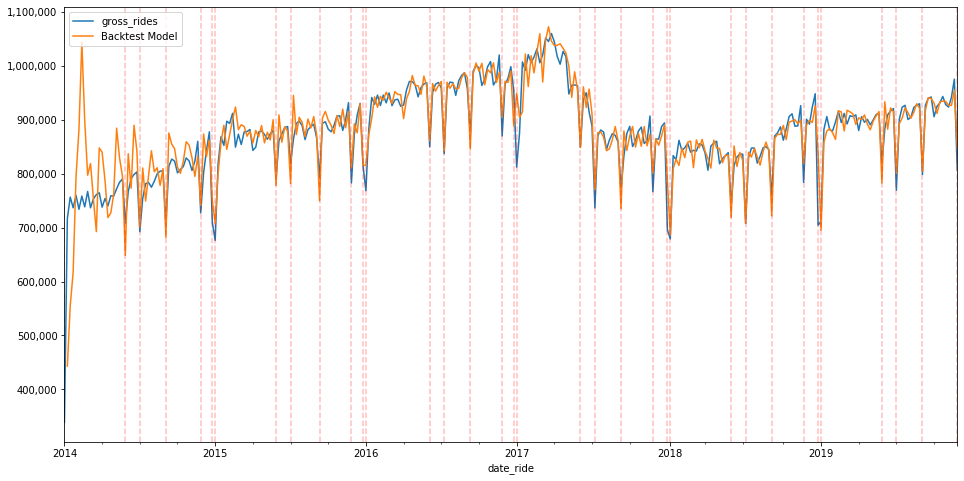

In [14]:
plt.clf()

ts.plot_fit(train[series], backtest, train);

In [15]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [16]:
intervals

,Predictions,lower gross_rides,upper gross_rides
2019-12-08 00:00:00,"915,648","854,741","976,554"
2019-12-15 00:00:00,"930,144","847,273","1,013,014"
2019-12-22 00:00:00,"942,694","847,587","1,037,800"
2019-12-29 00:00:00,"823,107","716,410","929,804"
2020-01-05 00:00:00,"820,935","699,703","942,167"
2020-01-12 00:00:00,"920,538","785,919","1,055,157"
2020-01-19 00:00:00,"935,910","783,628","1,088,193"
2020-01-26 00:00:00,"827,541","661,390","993,692"
2020-02-02 00:00:00,"931,604","751,384","1,111,824"
2020-02-09 00:00:00,"925,179","729,952","1,120,405"


In [17]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

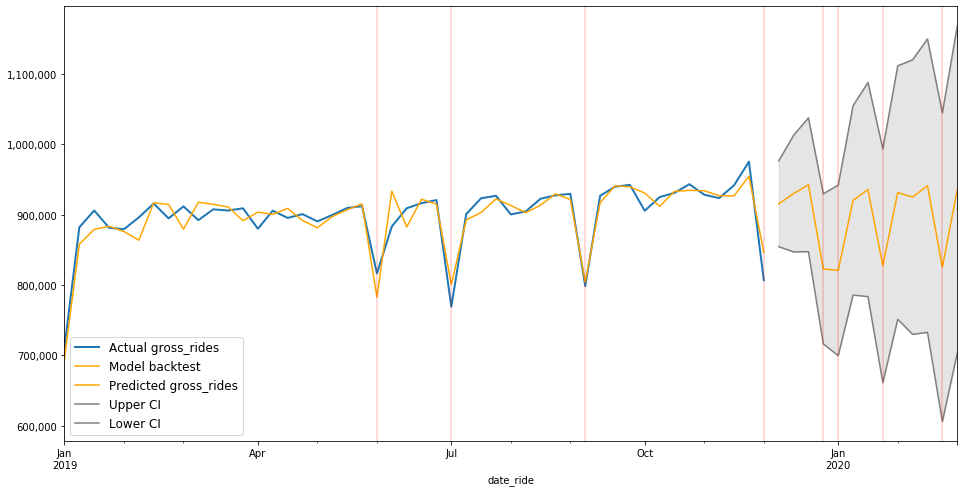

In [18]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [19]:
gross_rides = ts.oos_weekly_df(model=model,
                               steps_ahead=horizon,
                               exog_data = oos_exog,
                               series = series,
                               add_date = True)

gross_rides

,gross_rides,lower_gross_rides,upper_gross_rides,fcast_date
2019-12-08,"915,647.63","854,741.04","976,554.23",2019-12-27
2019-12-15,"930,143.95","847,273.45","1,013,014.46",2019-12-27
2019-12-22,"942,693.68","847,587.46","1,037,799.90",2019-12-27
2019-12-29,"823,107.00","716,409.55","929,804.46",2019-12-27
2020-01-05,"820,935.01","699,702.83","942,167.19",2019-12-27
2020-01-12,"920,537.73","785,918.52","1,055,156.95",2019-12-27
2020-01-19,"935,910.44","783,627.93","1,088,192.95",2019-12-27
2020-01-26,"827,541.18","661,390.05","993,692.31",2019-12-27
2020-02-02,"931,604.10","751,384.22","1,111,823.98",2019-12-27
2020-02-09,"925,178.54","729,952.29","1,120,404.78",2019-12-27


# Ver Pd Rides

In [20]:
series = 'vp_rides'

In [21]:
model = ts.build_model(train[series],
                       p=1,
                       d=0,
                       q=1,
                       S=5,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=0)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                          vp_rides   No. Observations:                  309
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 5)   Log Likelihood               -3566.742
Date:                           Fri, 27 Dec 2019   AIC                           7145.483
Time:                                   15:18:45   BIC                           7167.786
Sample:                               01-05-2014   HQIC                          7154.405
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -1.381e+05   3424.626    -40.318      0.000   -1.45e+05   -1.31e+05
ar.L1          0.8947      0.020     44.910      0.000       0.856       0.934
ma.L1         -0.6922      0.046    -15.001      0.000      -0.783      -0.602
ar.S.L5       -0.4686      0.052     -8.937      0.000      -0.571      -0.366
ar.S.L10      -0.1833      0.050     -3.694      0.000      -0.281      -0.086
sigma2       1.07e+09      0.063   1.71e+10      0.000    1.07e+09    1.07e+09
===================================================================================
Ljung-Box (Q):                       47.36   Jarque-Bera (JB):               273.28
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -0.89
Prob(H) (two-sided):                  0.56   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+26. Standard errors may be unstable.
"""

In [22]:
ts.get_dw(model)

0.7728359993952026

In [23]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [24]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

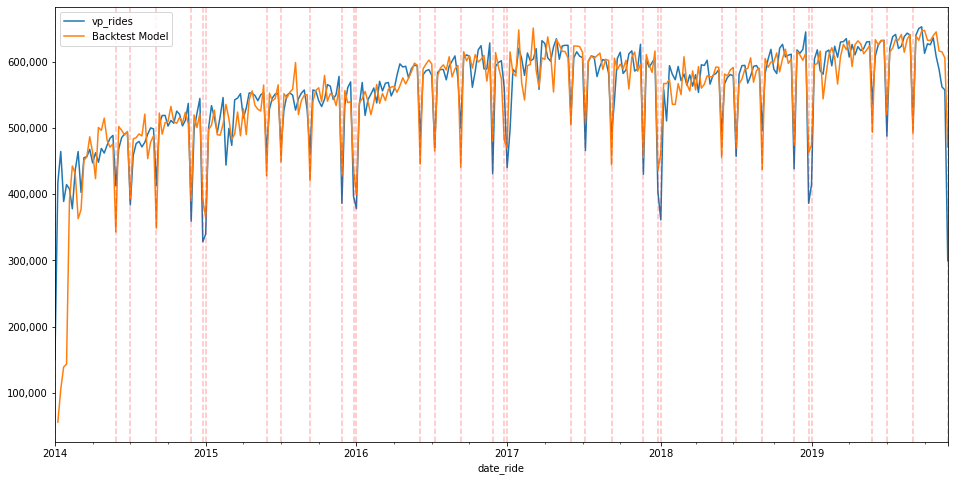

In [25]:
ts.plot_fit(train[series], backtest, train);

In [26]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [27]:
intervals

,Predictions,lower vp_rides,upper vp_rides
2019-12-08 00:00:00,"564,650","500,542","628,757"
2019-12-15 00:00:00,"548,872","483,464","614,280"
2019-12-22 00:00:00,"544,434","478,004","610,865"
2019-12-29 00:00:00,"409,040","341,802","476,279"
2020-01-05 00:00:00,"355,076","287,199","422,954"
2020-01-12 00:00:00,"557,334","477,311","637,357"
2020-01-19 00:00:00,"539,803","458,507","621,100"
2020-01-26 00:00:00,"397,826","315,523","480,128"
2020-02-02 00:00:00,"538,749","455,650","621,848"
2020-02-09 00:00:00,"480,583","396,852","564,313"


In [28]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

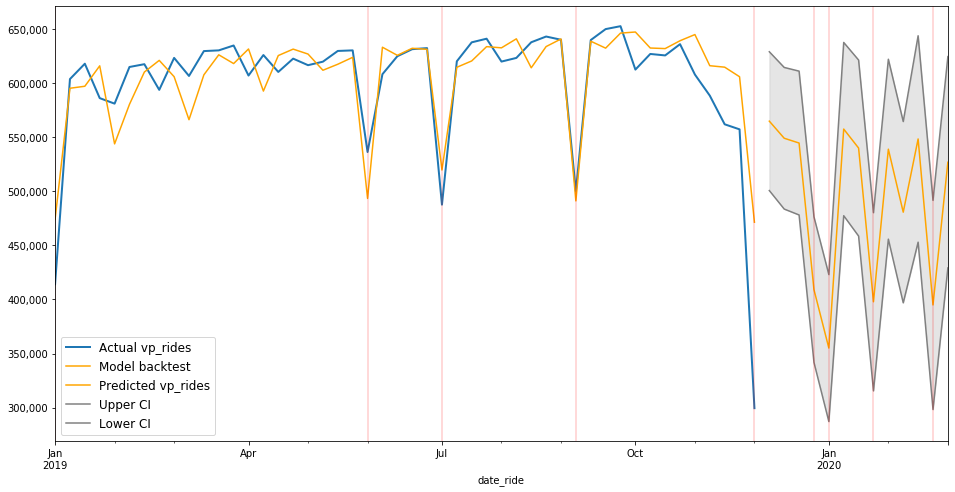

In [29]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01');

In [30]:
vp_rides = ts.oos_weekly_df(model=model,
                            steps_ahead=horizon,
                            exog_data = oos_exog,
                            series = series,
                            add_date = False)

vp_rides

,vp_rides,lower_vp_rides,upper_vp_rides
2019-12-08,"564,649.73","500,542.20","628,757.27"
2019-12-15,"548,871.59","483,463.55","614,279.63"
2019-12-22,"544,434.28","478,003.58","610,864.99"
2019-12-29,"409,040.41","341,802.29","476,278.53"
2020-01-05,"355,076.06","287,198.55","422,953.56"
2020-01-12,"557,333.99","477,311.37","637,356.60"
2020-01-19,"539,803.30","458,506.56","621,100.04"
2020-01-26,"397,825.62","315,523.19","480,128.05"
2020-02-02,"538,749.09","455,650.40","621,847.77"
2020-02-09,"480,582.80","396,852.20","564,313.41"


# Ver Pd Costs

In [31]:
series = 'vp_costs'

In [32]:
model = ts.build_model(train[series],
                       p=2,
                       d=0,
                       q=0,
                       S=2,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=1)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                          vp_costs   No. Observations:                  309
Model:             SARIMAX(2, 0, 0)x(2, 1, 1, 2)   Log Likelihood               -4617.382
Date:                           Fri, 27 Dec 2019   AIC                           9248.763
Time:                                   15:18:56   BIC                           9274.851
Sample:                               01-05-2014   HQIC                          9259.195
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -3.816e+06   9.24e+04    -41.290      0.000      -4e+06   -3.63e+06
ar.L1          0.5386      0.038     14.151      0.000       0.464       0.613
ar.L2          0.4498      0.040     11.290      0.000       0.372       0.528
ar.S.L2       -0.2294      0.041     -5.661      0.000      -0.309      -0.150
ar.S.L4       -0.0980      0.069     -1.427      0.154      -0.233       0.037
ma.S.L2       -0.9659      0.041    -23.636      0.000      -1.046      -0.886
sigma2      7.593e+11      0.020   3.75e+13      0.000    7.59e+11    7.59e+11
===================================================================================
Ljung-Box (Q):                       36.71   Jarque-Bera (JB):               346.85
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.69
Prob(H) (two-sided):                  0.46   Kurtosis:                         8.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.41e+30. Standard errors may be unstable.
"""

In [33]:
ts.get_dw(model)

1.351693051681202

In [34]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [35]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

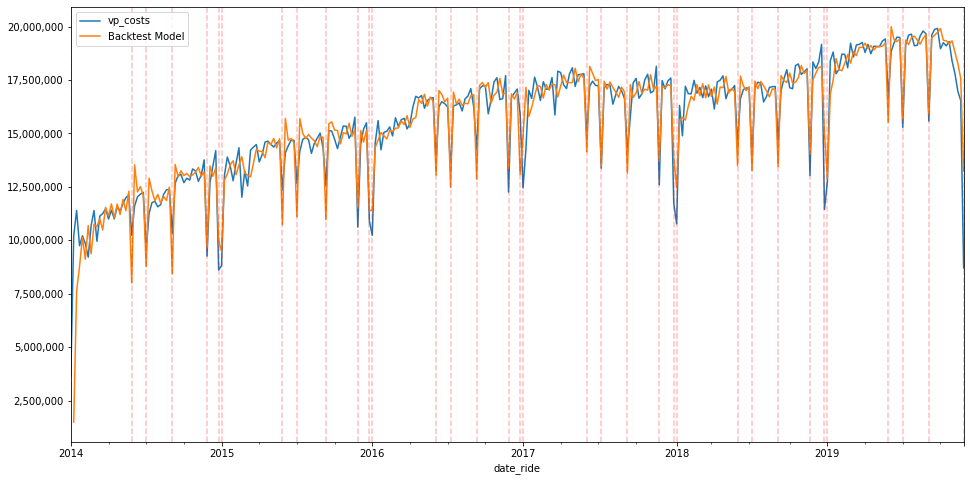

In [36]:
ts.plot_fit(train[series], backtest, train)

In [37]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [38]:
intervals

,Predictions,lower vp_costs,upper vp_costs
2019-12-08 00:00:00,"14,641,411","12,933,556","16,349,265"
2019-12-15 00:00:00,"14,625,360","12,685,525","16,565,195"
2019-12-22 00:00:00,"14,658,656","12,507,370","16,809,941"
2019-12-29 00:00:00,"10,895,827","8,558,141","13,233,512"
2020-01-05 00:00:00,"10,852,241","8,354,984","13,349,498"
2020-01-12 00:00:00,"14,451,598","11,802,308","17,100,888"
2020-01-19 00:00:00,"14,568,158","11,746,892","17,389,423"
2020-01-26 00:00:00,"10,620,192","7,652,614","13,587,770"
2020-02-02 00:00:00,"14,510,952","11,388,609","17,633,295"
2020-02-09 00:00:00,"14,392,264","11,132,394","17,652,135"


In [39]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

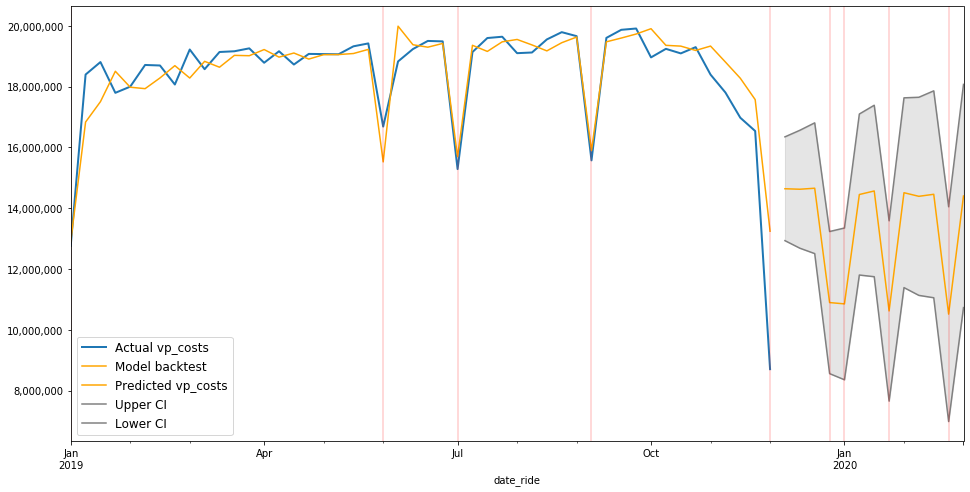

In [40]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [41]:
vp_costs = ts.oos_weekly_df(model=model,
                            steps_ahead=horizon,
                            exog_data = oos_exog,
                            series = series,
                            add_date = False)

vp_costs

,vp_costs,lower_vp_costs,upper_vp_costs
2019-12-08,"14,641,410.60","12,933,555.85","16,349,265.35"
2019-12-15,"14,625,359.86","12,685,525.07","16,565,194.65"
2019-12-22,"14,658,655.56","12,507,370.12","16,809,941.01"
2019-12-29,"10,895,826.95","8,558,141.47","13,233,512.43"
2020-01-05,"10,852,240.68","8,354,983.56","13,349,497.80"
2020-01-12,"14,451,597.66","11,802,307.74","17,100,887.58"
2020-01-19,"14,568,157.72","11,746,892.39","17,389,423.05"
2020-01-26,"10,620,191.87","7,652,614.17","13,587,769.56"
2020-02-02,"14,510,951.97","11,388,608.91","17,633,295.03"
2020-02-09,"14,392,264.32","11,132,393.83","17,652,134.81"


# Ver Pd Miles

In [42]:
series = 'vp_miles'

In [43]:
model = ts.build_model(train[series],
                       p=1,
                       d=1,
                       q=1,
                       S=5,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=0)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                          vp_miles   No. Observations:                  309
Model:             SARIMAX(1, 1, 1)x(2, 1, 0, 5)   Log Likelihood               -4461.175
Date:                           Fri, 27 Dec 2019   AIC                           8934.349
Time:                                   15:19:04   BIC                           8956.631
Sample:                               01-05-2014   HQIC                          8943.263
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday     -1.53e+06   6.79e+04    -22.516      0.000   -1.66e+06    -1.4e+06
ar.L1          0.1527      0.081      1.885      0.059      -0.006       0.312
ma.L1         -0.6671      0.075     -8.837      0.000      -0.815      -0.519
ar.S.L5       -0.5623      0.037    -15.197      0.000      -0.635      -0.490
ar.S.L10      -0.2889      0.041     -7.114      0.000      -0.368      -0.209
sigma2      4.321e+11      0.136   3.17e+12      0.000    4.32e+11    4.32e+11
===================================================================================
Ljung-Box (Q):                       67.20   Jarque-Bera (JB):              2356.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.36e+27. Standard errors may be unstable.
"""

In [44]:
ts.get_dw(model)

1.61786730637148

In [45]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [46]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

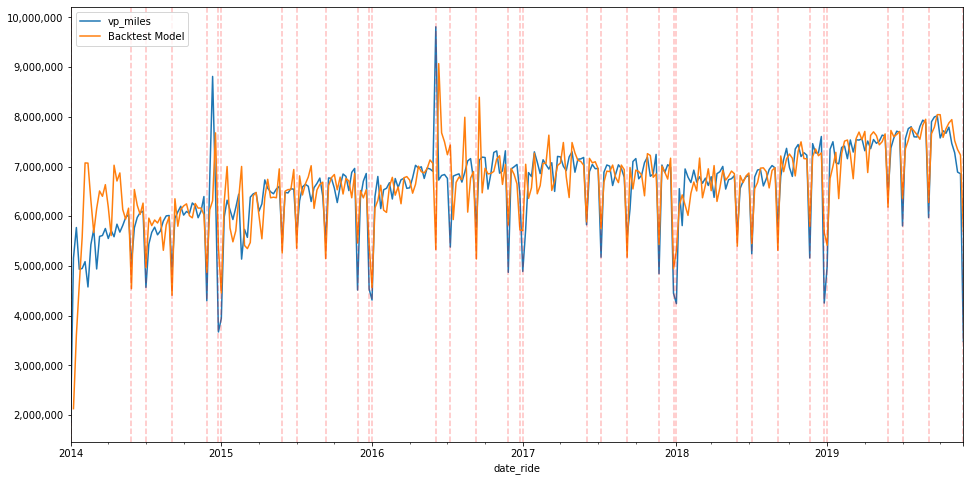

In [47]:
ts.plot_fit(train[series], backtest, train)

In [48]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [49]:
intervals

,Predictions,lower vp_miles,upper vp_miles
2019-12-08 00:00:00,"6,086,571","4,798,179","7,374,963"
2019-12-15 00:00:00,"6,048,591","4,616,333","7,480,849"
2019-12-22 00:00:00,"5,835,618","4,310,371","7,360,866"
2019-12-29 00:00:00,"4,397,112","2,789,185","6,005,038"
2020-01-05 00:00:00,"3,651,889","1,966,043","5,337,735"
2020-01-12 00:00:00,"5,569,286","3,572,473","7,566,099"
2020-01-19 00:00:00,"5,373,027","3,229,275","7,516,779"
2020-01-26 00:00:00,"3,685,822","1,419,342","5,952,303"
2020-02-02 00:00:00,"5,231,597","2,850,780","7,612,413"
2020-02-09 00:00:00,"4,436,622","1,947,016","6,926,227"


In [50]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

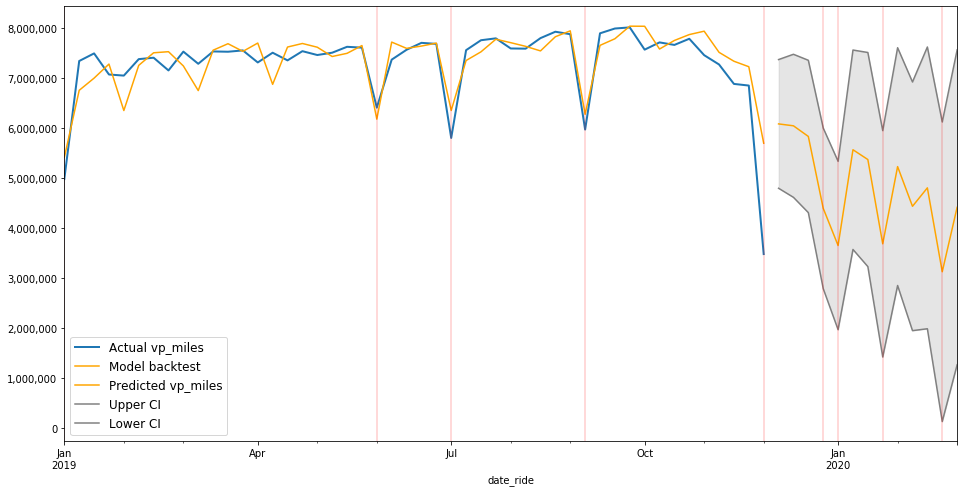

In [51]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01');

In [52]:
vp_miles = ts.oos_weekly_df(model=model,
                            steps_ahead=horizon,
                            exog_data = oos_exog,
                            series = series,
                            add_date = False)

vp_miles

,vp_miles,lower_vp_miles,upper_vp_miles
2019-12-08,"6,086,570.83","4,798,179.06","7,374,962.60"
2019-12-15,"6,048,590.97","4,616,332.93","7,480,849.01"
2019-12-22,"5,835,618.35","4,310,370.61","7,360,866.08"
2019-12-29,"4,397,111.61","2,789,185.10","6,005,038.13"
2020-01-05,"3,651,889.06","1,966,042.70","5,337,735.43"
2020-01-12,"5,569,285.74","3,572,472.76","7,566,098.72"
2020-01-19,"5,373,027.14","3,229,274.80","7,516,779.48"
2020-01-26,"3,685,822.48","1,419,341.63","5,952,303.33"
2020-02-02,"5,231,596.74","2,850,780.05","7,612,413.43"
2020-02-09,"4,436,621.79","1,947,016.25","6,926,227.34"


# Ver Pd Amb Rides

In [53]:
series = 'vp_ambulatory_rides'

In [54]:
model = ts.build_model(train[series],
                       p=2,
                       d=1,
                       q=1,
                       S=4,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=1)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:               vp_ambulatory_rides   No. Observations:                  309
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 4)   Log Likelihood               -3521.889
Date:                           Fri, 27 Dec 2019   AIC                           7059.777
Time:                                   15:19:13   BIC                           7089.513
Sample:                               01-05-2014   HQIC                          7071.672
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -9.673e+04   2957.453    -32.706      0.000   -1.03e+05   -9.09e+04
ar.L1         -0.9208      0.083    -11.116      0.000      -1.083      -0.758
ar.L2         -0.1190      0.037     -3.211      0.001      -0.192      -0.046
ma.L1          0.9169      0.091     10.085      0.000       0.739       1.095
ar.S.L4        0.3610      0.059      6.168      0.000       0.246       0.476
ar.S.L8        0.0661      0.040      1.666      0.096      -0.012       0.144
ma.S.L4       -0.9380      0.046    -20.347      0.000      -1.028      -0.848
sigma2      7.404e+08      0.052   1.42e+10      0.000     7.4e+08     7.4e+08
===================================================================================
Ljung-Box (Q):                       96.61   Jarque-Bera (JB):               708.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -1.37
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.04e+26. Standard errors may be unstable.
"""

In [55]:
ts.get_dw(model)

1.1657425733386846

In [56]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [57]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

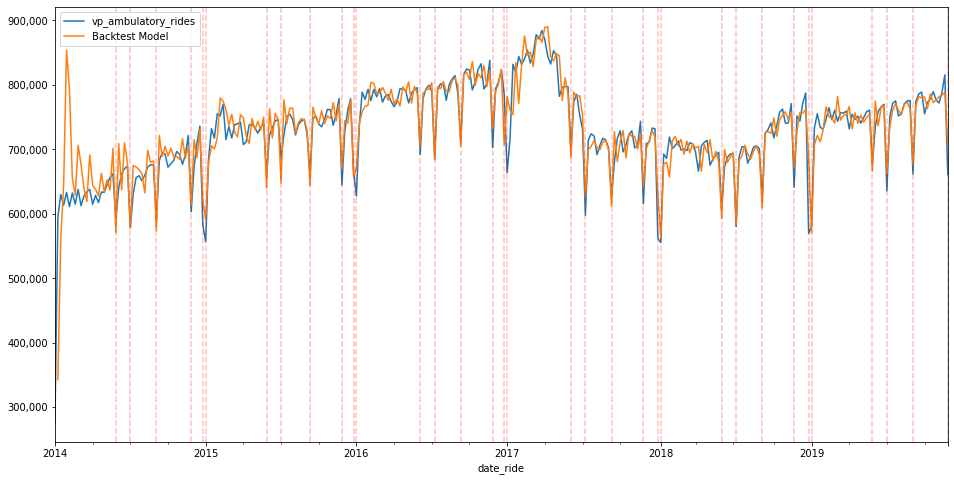

In [58]:
ts.plot_fit(train[series], backtest, train)

In [59]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [60]:
intervals

,Predictions,lower vp_ambulatory_rides,upper vp_ambulatory_rides
2019-12-08 00:00:00,"756,486","703,156","809,817"
2019-12-15 00:00:00,"776,426","701,153","851,700"
2019-12-22 00:00:00,"779,214","690,491","867,938"
2019-12-29 00:00:00,"659,943","556,769","763,117"
2020-01-05 00:00:00,"657,012","531,935","782,089"
2020-01-12 00:00:00,"770,739","625,363","916,116"
2020-01-19 00:00:00,"770,429","609,583","931,275"
2020-01-26 00:00:00,"657,164","480,415","833,914"
2020-02-02 00:00:00,"753,486","557,454","949,517"
2020-02-09 00:00:00,"767,478","552,851","982,105"


In [61]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

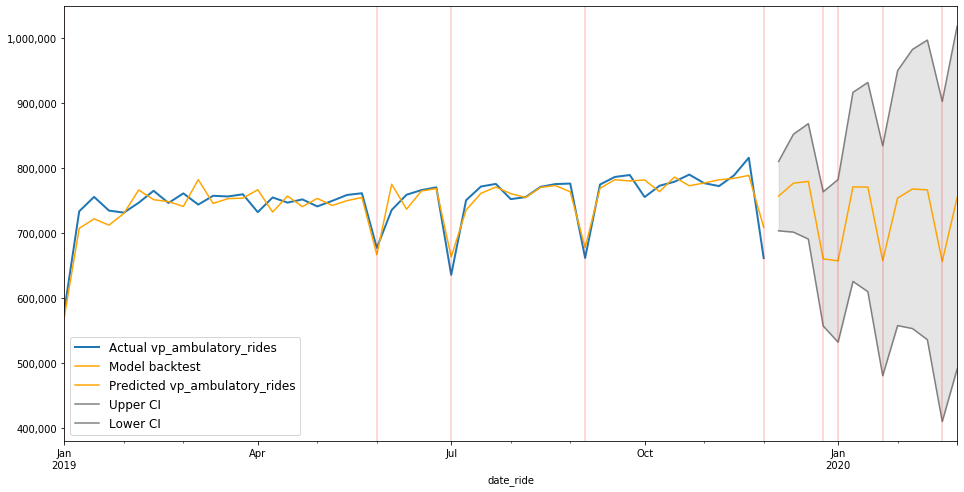

In [62]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [63]:
vp_ambulatory_rides = ts.oos_weekly_df(model=model,
                                       steps_ahead=horizon,
                                       exog_data = oos_exog,
                                       series = series,
                                       add_date = False)

vp_ambulatory_rides

,vp_ambulatory_rides,lower_vp_ambulatory_rides,upper_vp_ambulatory_rides
2019-12-08,"756,486.42","703,155.61","809,817.23"
2019-12-15,"776,426.19","701,152.68","851,699.69"
2019-12-22,"779,214.29","690,490.94","867,937.65"
2019-12-29,"659,943.13","556,769.39","763,116.87"
2020-01-05,"657,011.95","531,934.56","782,089.35"
2020-01-12,"770,739.49","625,363.11","916,115.87"
2020-01-19,"770,429.41","609,583.41","931,275.42"
2020-01-26,"657,164.33","480,414.54","833,914.11"
2020-02-02,"753,485.60","557,453.94","949,517.26"
2020-02-09,"767,477.96","552,850.73","982,105.18"


# Ver Pd Amb Costs

In [64]:
series = 'vp_ambulatory_costs'

In [65]:
model = ts.build_model(train[series],
                       p=1,
                       d=0,
                       q=1,
                       S=5,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=0)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:               vp_ambulatory_costs   No. Observations:                  309
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 5)   Log Likelihood               -4495.918
Date:                           Fri, 27 Dec 2019   AIC                           9003.837
Time:                                   15:19:21   BIC                           9026.139
Sample:                               01-05-2014   HQIC                          9012.758
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -2.869e+06   7.61e+04    -37.720      0.000   -3.02e+06   -2.72e+06
ar.L1          0.9028      0.023     38.988      0.000       0.857       0.948
ma.L1         -0.7058      0.052    -13.480      0.000      -0.808      -0.603
ar.S.L5       -0.4872      0.057     -8.604      0.000      -0.598      -0.376
ar.S.L10      -0.2114      0.055     -3.878      0.000      -0.318      -0.105
sigma2      4.903e+11      0.060   8.13e+12      0.000     4.9e+11     4.9e+11
===================================================================================
Ljung-Box (Q):                       47.68   Jarque-Bera (JB):               471.21
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                            -1.07
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.64e+27. Standard errors may be unstable.
"""

In [66]:
ts.get_dw(model)

0.8754256306004861

In [67]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [68]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

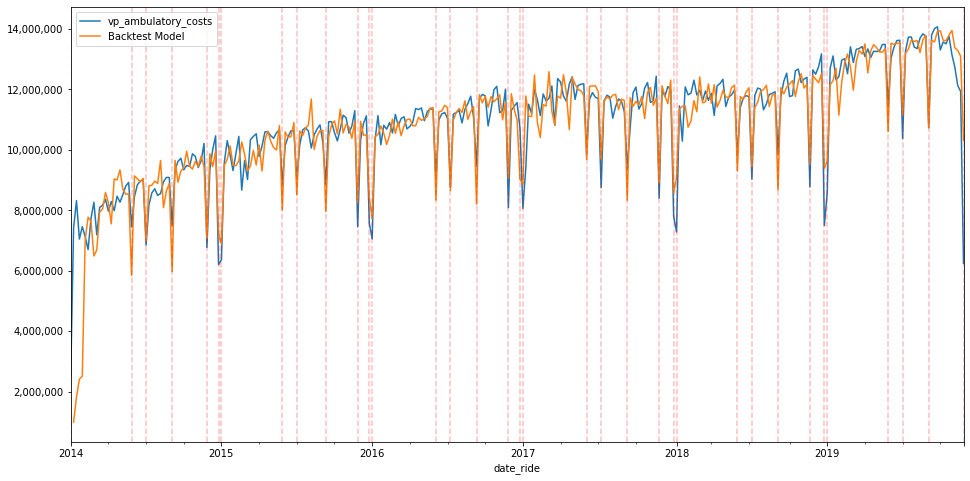

In [69]:
ts.plot_fit(train[series], backtest, train)

In [70]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [71]:
intervals

,Predictions,lower vp_ambulatory_costs,upper vp_ambulatory_costs
2019-12-08 00:00:00,"12,170,603","10,798,218","13,542,988"
2019-12-15 00:00:00,"11,865,267","10,466,502","13,264,032"
2019-12-22 00:00:00,"11,714,207","10,294,304","13,134,110"
2019-12-29 00:00:00,"8,880,453","7,443,550","10,317,355"
2020-01-05 00:00:00,"7,643,885","6,193,274","9,094,496"
2020-01-12 00:00:00,"12,015,344","10,316,949","13,713,740"
2020-01-19 00:00:00,"11,663,857","9,939,029","13,388,684"
2020-01-26 00:00:00,"8,677,095","6,931,021","10,423,170"
2020-02-02 00:00:00,"11,564,343","9,801,140","13,327,545"
2020-02-09 00:00:00,"10,263,241","8,486,199","12,040,282"


In [72]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

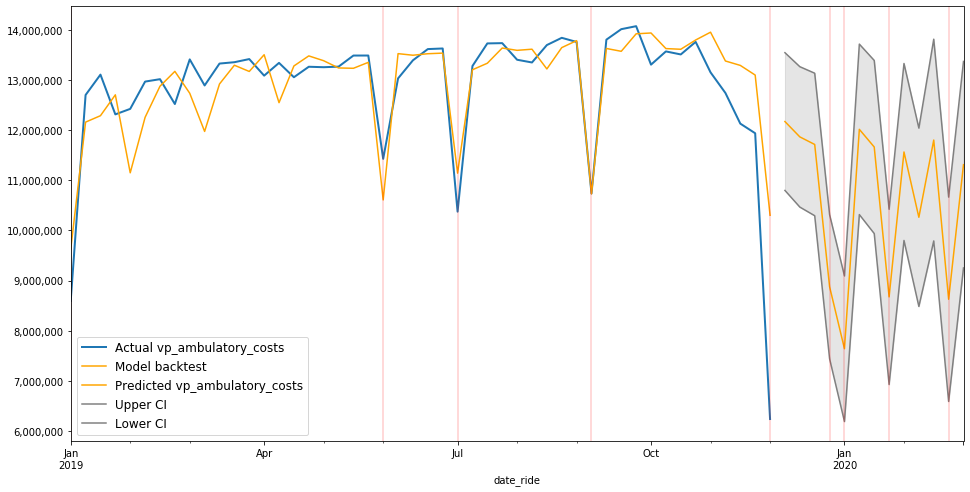

In [73]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [74]:
vp_ambulatory_costs = ts.oos_weekly_df(model=model,
                                       steps_ahead=horizon,
                                       exog_data = oos_exog,
                                       series = series,
                                       add_date = False)

vp_ambulatory_costs

,vp_ambulatory_costs,lower_vp_ambulatory_costs,upper_vp_ambulatory_costs
2019-12-08,"12,170,602.98","10,798,218.26","13,542,987.70"
2019-12-15,"11,865,266.92","10,466,502.30","13,264,031.53"
2019-12-22,"11,714,207.00","10,294,303.61","13,134,110.39"
2019-12-29,"8,880,452.57","7,443,549.78","10,317,355.37"
2020-01-05,"7,643,885.00","6,193,273.97","9,094,496.02"
2020-01-12,"12,015,344.43","10,316,948.69","13,713,740.17"
2020-01-19,"11,663,856.56","9,939,029.49","13,388,683.63"
2020-01-26,"8,677,095.26","6,931,020.94","10,423,169.58"
2020-02-02,"11,564,342.54","9,801,139.76","13,327,545.31"
2020-02-09,"10,263,240.62","8,486,199.21","12,040,282.04"


# Ver Pd Stretcher Rides

In [75]:
series = 'vp_stretcher_rides'

In [76]:
model = ts.build_model(train[series],
                       p=2,
                       d=1,
                       q=1,
                       S=4,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=1)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                vp_stretcher_rides   No. Observations:                  309
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 4)   Log Likelihood               -2334.614
Date:                           Fri, 27 Dec 2019   AIC                           4685.228
Time:                                   15:19:30   BIC                           4714.964
Sample:                               01-05-2014   HQIC                          4697.123
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -1510.6225     63.030    -23.967      0.000   -1634.160   -1387.085
ar.L1         -0.8609      0.116     -7.422      0.000      -1.088      -0.634
ar.L2         -0.2087      0.051     -4.060      0.000      -0.309      -0.108
ma.L1          0.8189      0.126      6.504      0.000       0.572       1.066
ar.S.L4        0.1534      0.055      2.799      0.005       0.046       0.261
ar.S.L8        0.0639      0.050      1.280      0.201      -0.034       0.162
ma.S.L4       -0.9496      0.033    -28.670      0.000      -1.015      -0.885
sigma2       2.65e+05    1.2e+04     22.148      0.000    2.42e+05    2.88e+05
===================================================================================
Ljung-Box (Q):                       43.32   Jarque-Bera (JB):               768.60
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
ts.get_dw(model)

1.0124307258008436

In [78]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [79]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

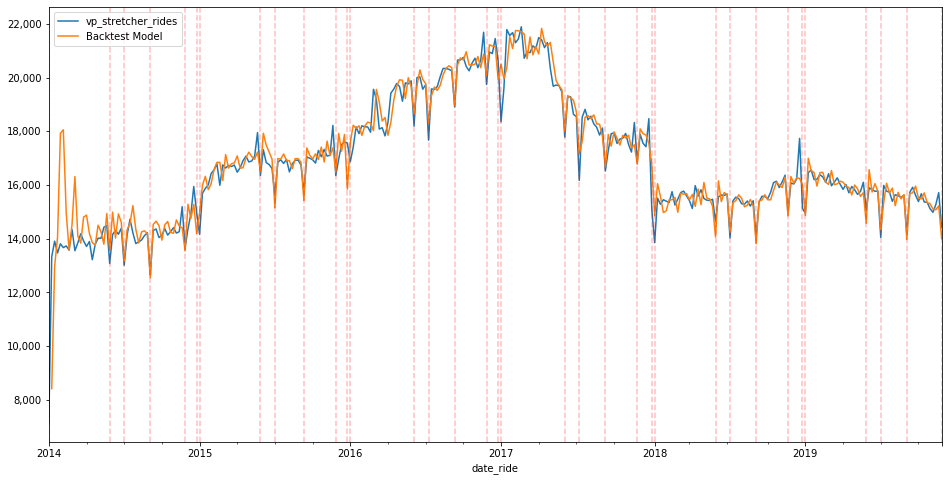

In [80]:
ts.plot_fit(train[series], backtest, train)

In [81]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [82]:
intervals

,Predictions,lower vp_stretcher_rides,upper vp_stretcher_rides
2019-12-08 00:00:00,"15,836","14,827","16,845"
2019-12-15 00:00:00,"15,911","14,513","17,308"
2019-12-22 00:00:00,"16,038","14,431","17,644"
2019-12-29 00:00:00,"14,438","12,571","16,305"
2020-01-05 00:00:00,"14,415","12,270","16,561"
2020-01-12 00:00:00,"16,011","13,599","18,422"
2020-01-19 00:00:00,"16,097","13,470","18,723"
2020-01-26 00:00:00,"14,498","11,656","17,339"
2020-02-02 00:00:00,"15,988","12,901","19,074"
2020-02-09 00:00:00,"16,066","12,750","19,382"


In [83]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

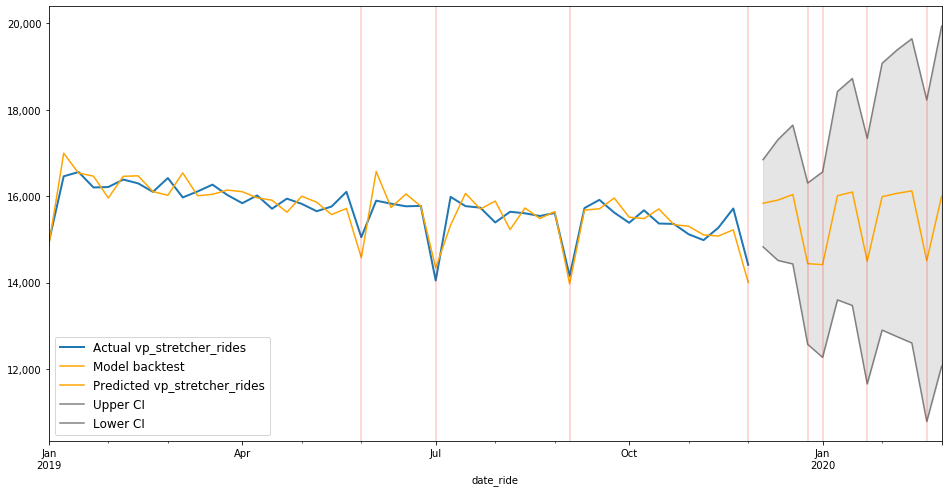

In [84]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [85]:
vp_stretcher_rides = ts.oos_weekly_df(model=model,
                                      steps_ahead=horizon,
                                      exog_data = oos_exog,
                                      series = series,
                                      add_date = False)

vp_stretcher_rides

,vp_stretcher_rides,lower_vp_stretcher_rides,upper_vp_stretcher_rides
2019-12-08,"15,836.35","14,827.33","16,845.37"
2019-12-15,"15,910.65","14,513.28","17,308.01"
2019-12-22,"16,037.79","14,431.32","17,644.26"
2019-12-29,"14,438.14","12,571.14","16,305.15"
2020-01-05,"14,415.30","12,270.00","16,560.59"
2020-01-12,"16,010.85","13,599.39","18,422.30"
2020-01-19,"16,096.57","13,470.05","18,723.09"
2020-01-26,"14,497.65","11,656.39","17,338.90"
2020-02-02,"15,987.62","12,900.88","19,074.35"
2020-02-09,"16,065.93","12,749.77","19,382.10"


# Ver Pd Stretcher Costs

In [86]:
series = 'vp_stretcher_costs'

In [87]:
model = ts.build_model(train[series],
                       p=2,
                       d=1,
                       q=0,
                       S=5,
                       exog_data = train['holiday'],
                       P=1,
                       D=1,
                       Q=1)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                vp_stretcher_costs   No. Observations:                  309
Model:             SARIMAX(2, 1, 0)x(1, 1, 1, 5)   Log Likelihood               -3828.558
Date:                           Fri, 27 Dec 2019   AIC                           7669.116
Time:                                   15:19:43   BIC                           7691.398
Sample:                               01-05-2014   HQIC                          7678.030
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -2.402e+05   1.02e+04    -23.465      0.000    -2.6e+05    -2.2e+05
ar.L1         -0.3651      0.065     -5.648      0.000      -0.492      -0.238
ar.L2         -0.2282      0.068     -3.372      0.001      -0.361      -0.096
ar.S.L5        0.1845      0.094      1.957      0.050      -0.000       0.369
ma.S.L5       -0.9098      0.061    -14.868      0.000      -1.030      -0.790
sigma2      7.221e+09      0.102   7.08e+10      0.000    7.22e+09    7.22e+09
===================================================================================
Ljung-Box (Q):                       34.34   Jarque-Bera (JB):                97.56
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.55e+25. Standard errors may be unstable.
"""

In [88]:
ts.get_dw(model)

1.5928867947397651

In [89]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [90]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

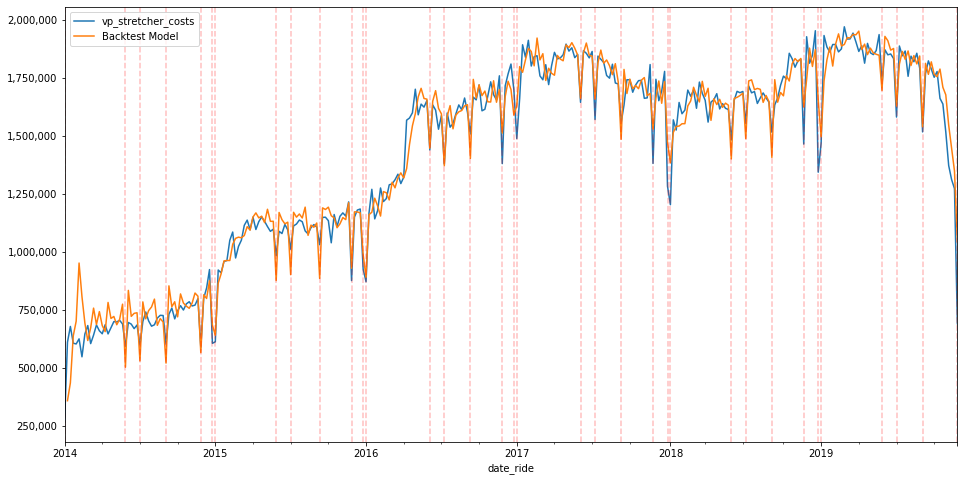

In [91]:
ts.plot_fit(train[series], backtest, train)

In [92]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [93]:
intervals

,Predictions,lower vp_stretcher_costs,upper vp_stretcher_costs
2019-12-08 00:00:00,"1,029,276","862,720","1,195,833"
2019-12-15 00:00:00,"1,006,648","809,362","1,203,934"
2019-12-22 00:00:00,"947,308","730,488","1,164,128"
2019-12-29 00:00:00,"712,831","469,890","955,772"
2020-01-05 00:00:00,"619,122","354,056","884,189"
2020-01-12 00:00:00,"877,819","573,940","1,181,697"
2020-01-19 00:00:00,"851,162","519,105","1,183,219"
2020-01-26 00:00:00,"588,743","232,317","945,169"
2020-02-02 00:00:00,"835,470","454,519","1,216,420"
2020-02-09 00:00:00,"781,908","378,191","1,185,625"


In [94]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

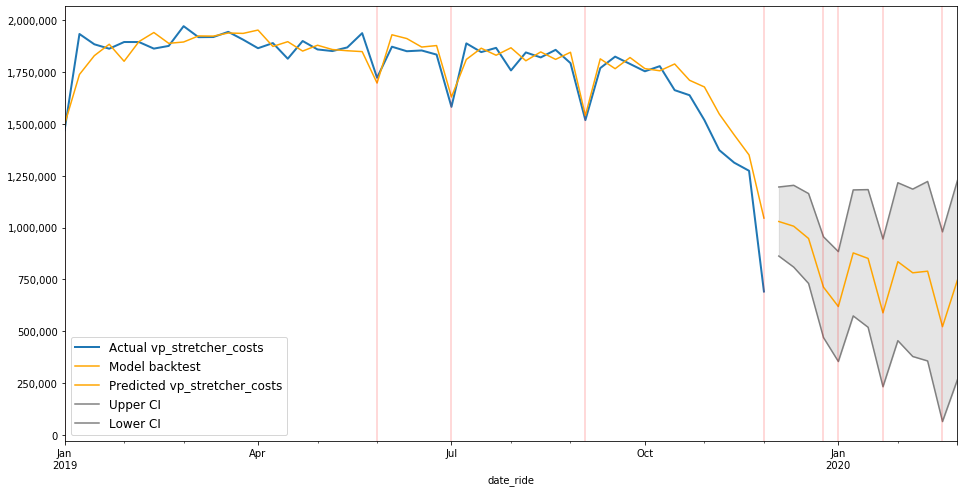

In [95]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [96]:
vp_stretcher_costs = ts.oos_weekly_df(model=model,
                                      steps_ahead=horizon,
                                      exog_data = oos_exog,
                                      series = series,
                                      add_date = False)

vp_stretcher_costs

,vp_stretcher_costs,lower_vp_stretcher_costs,upper_vp_stretcher_costs
2019-12-08,"1,029,276.48","862,720.46","1,195,832.51"
2019-12-15,"1,006,647.73","809,361.81","1,203,933.65"
2019-12-22,"947,308.14","730,488.01","1,164,128.27"
2019-12-29,"712,831.12","469,890.36","955,771.88"
2020-01-05,"619,122.37","354,056.24","884,188.50"
2020-01-12,"877,818.51","573,940.48","1,181,696.54"
2020-01-19,"851,162.26","519,105.29","1,183,219.23"
2020-01-26,"588,743.29","232,317.17","945,169.42"
2020-02-02,"835,469.55","454,519.45","1,216,419.64"
2020-02-09,"781,908.20","378,191.10","1,185,625.30"


# Ver Pd Wheelchair Rides

In [97]:
series = 'vp_wheelchair_rides'

In [98]:
model = ts.build_model(train[series],
                       p=2,
                       d=1,
                       q=0,
                       S=12,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=0)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                vp_wheelchair_rides   No. Observations:                  309
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2911.735
Date:                            Fri, 27 Dec 2019   AIC                           5835.471
Time:                                    15:19:56   BIC                           5857.613
Sample:                                01-05-2014   HQIC                          5844.336
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -1.119e+04    431.245    -25.943      0.000    -1.2e+04   -1.03e+04
ar.L1          0.1346      0.024      5.656      0.000       0.088       0.181
ar.L2         -0.2063      0.048     -4.295      0.000      -0.300      -0.112
ar.S.L12      -0.4738      0.026    -18.039      0.000      -0.525      -0.422
ar.S.L24      -0.2534      0.021    -12.212      0.000      -0.294      -0.213
sigma2       2.11e+07      0.012   1.71e+09      0.000    2.11e+07    2.11e+07
===================================================================================
Ljung-Box (Q):                      129.28   Jarque-Bera (JB):               209.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.15e+25. Standard errors may be unstable.
"""

In [99]:
ts.get_dw(model)

1.2714809847470145

In [100]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [101]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

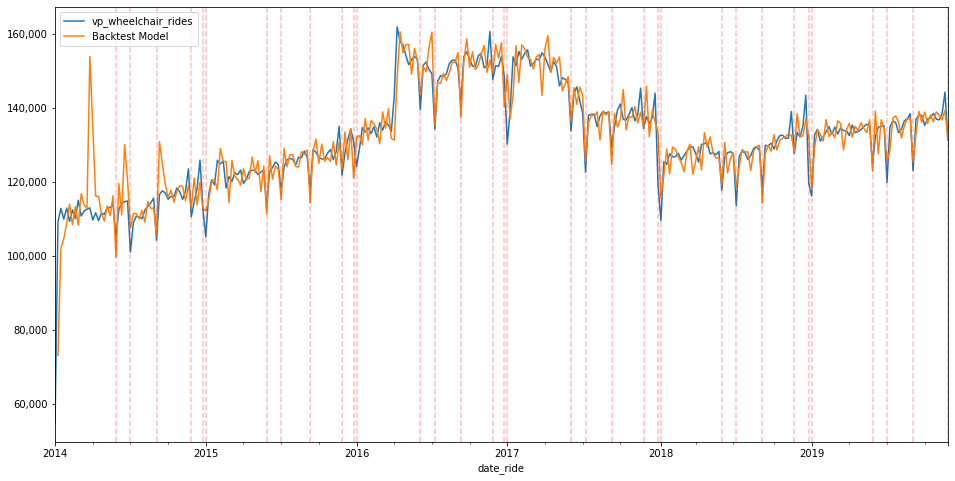

In [102]:
ts.plot_fit(train[series], backtest, train)

In [103]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [104]:
intervals

,Predictions,lower vp_wheelchair_rides,upper vp_wheelchair_rides
2019-12-08 00:00:00,"142,811","133,807","151,815"
2019-12-15 00:00:00,"142,960","129,342","156,578"
2019-12-22 00:00:00,"142,927","126,862","158,991"
2019-12-29 00:00:00,"130,698","112,732","148,663"
2020-01-05 00:00:00,"132,003","112,200","151,805"
2020-01-12 00:00:00,"143,352","121,816","164,888"
2020-01-19 00:00:00,"143,613","120,488","166,739"
2020-01-26 00:00:00,"132,005","107,403","156,606"
2020-02-02 00:00:00,"143,491","117,497","169,485"
2020-02-09 00:00:00,"144,601","117,282","171,919"


In [105]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

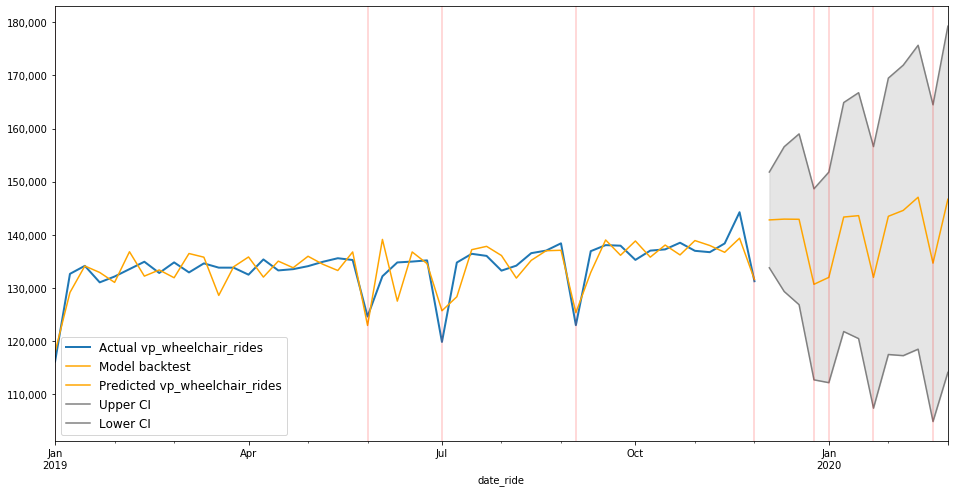

In [106]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [107]:
vp_wheelchair_rides = ts.oos_weekly_df(model=model,
                                       steps_ahead=horizon,
                                       exog_data = oos_exog,
                                       series = series,
                                       add_date = False)

vp_wheelchair_rides

,vp_wheelchair_rides,lower_vp_wheelchair_rides,upper_vp_wheelchair_rides
2019-12-08,"142,811.28","133,807.34","151,815.21"
2019-12-15,"142,960.00","129,342.40","156,577.61"
2019-12-22,"142,926.54","126,862.27","158,990.82"
2019-12-29,"130,697.72","112,732.15","148,663.29"
2020-01-05,"132,002.79","112,200.49","151,805.10"
2020-01-12,"143,351.75","121,815.70","164,887.81"
2020-01-19,"143,613.46","120,487.92","166,739.00"
2020-01-26,"132,004.51","107,403.44","156,605.57"
2020-02-02,"143,490.91","117,496.72","169,485.10"
2020-02-09,"144,600.50","117,281.85","171,919.16"


# Ver Pd Wheelchair Costs

In [108]:
series = 'vp_wheelchair_costs'

In [109]:
model = ts.build_model(train[series],
                       p=2,
                       d=1,
                       q=0,
                       S=6,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=0)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:               vp_wheelchair_costs   No. Observations:                  309
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 6)   Log Likelihood               -4100.978
Date:                           Fri, 27 Dec 2019   AIC                           8213.956
Time:                                   15:20:10   BIC                           8236.218
Sample:                               01-05-2014   HQIC                          8222.863
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -5.957e+05    2.2e+04    -27.054      0.000   -6.39e+05   -5.53e+05
ar.L1         -0.3631      0.054     -6.709      0.000      -0.469      -0.257
ar.L2         -0.2103      0.081     -2.590      0.010      -0.369      -0.051
ar.S.L6       -0.5986      0.052    -11.604      0.000      -0.700      -0.497
ar.S.L12      -0.2968      0.045     -6.572      0.000      -0.385      -0.208
sigma2      4.567e+10      0.079   5.81e+11      0.000    4.57e+10    4.57e+10
===================================================================================
Ljung-Box (Q):                       48.55   Jarque-Bera (JB):               180.35
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.80
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.13e+27. Standard errors may be unstable.
"""

In [110]:
ts.get_dw(model)

1.445426643240133

In [111]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [112]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

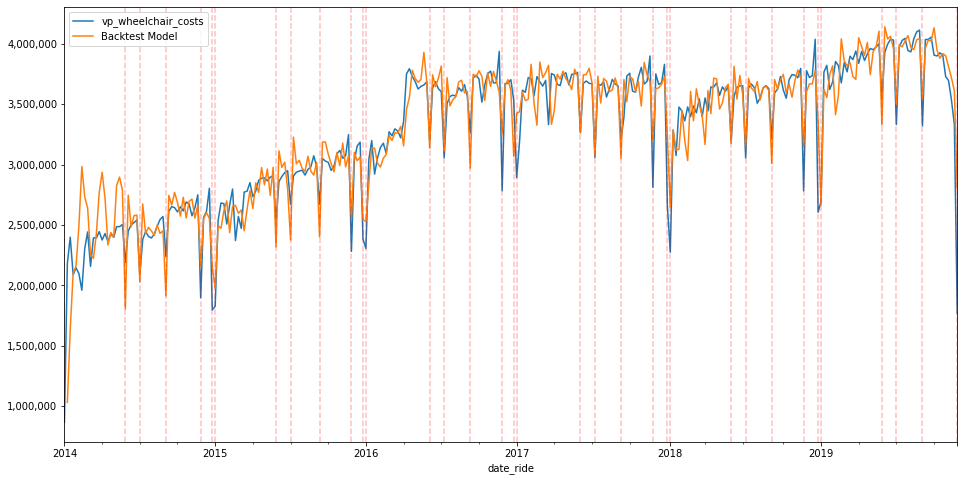

In [113]:
ts.plot_fit(train[series], backtest, train)

In [114]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [115]:
intervals

,Predictions,lower vp_wheelchair_costs,upper vp_wheelchair_costs
2019-12-08 00:00:00,"2,743,946","2,325,110","3,162,781"
2019-12-15 00:00:00,"2,725,623","2,229,060","3,222,186"
2019-12-22 00:00:00,"2,649,245","2,100,352","3,198,139"
2019-12-29 00:00:00,"1,986,929","1,371,737","2,602,121"
2020-01-05 00:00:00,"1,918,713","1,247,372","2,590,053"
2020-01-12 00:00:00,"2,066,724","1,345,772","2,787,676"
2020-01-19 00:00:00,"2,249,140","1,407,116","3,091,164"
2020-01-26 00:00:00,"1,594,925","673,687","2,516,164"
2020-02-02 00:00:00,"2,154,430","1,165,430","3,143,429"
2020-02-09 00:00:00,"2,035,530","976,852","3,094,208"


In [116]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

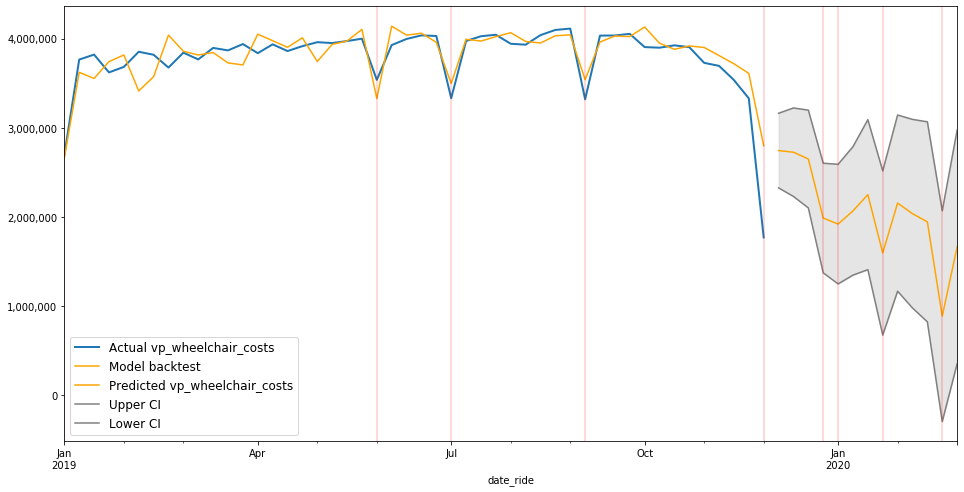

In [117]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [118]:
vp_wheelchair_costs = ts.oos_weekly_df(model=model,
                                       steps_ahead=horizon,
                                       exog_data = oos_exog,
                                       series = series,
                                       add_date = False)

vp_wheelchair_costs

,vp_wheelchair_costs,lower_vp_wheelchair_costs,upper_vp_wheelchair_costs
2019-12-08,"2,743,945.62","2,325,110.05","3,162,781.19"
2019-12-15,"2,725,622.87","2,229,060.04","3,222,185.69"
2019-12-22,"2,649,245.32","2,100,352.09","3,198,138.54"
2019-12-29,"1,986,928.97","1,371,737.02","2,602,120.92"
2020-01-05,"1,918,712.81","1,247,372.17","2,590,053.45"
2020-01-12,"2,066,723.65","1,345,771.52","2,787,675.79"
2020-01-19,"2,249,140.06","1,407,115.64","3,091,164.49"
2020-01-26,"1,594,925.45","673,686.55","2,516,164.34"
2020-02-02,"2,154,429.83","1,165,430.39","3,143,429.27"
2020-02-09,"2,035,529.75","976,851.63","3,094,207.86"


# Riders

In [119]:
series = 'riders'

In [120]:
model = ts.build_model(train[series],
                       p=2,
                       d=1,
                       q=2,
                       S=6,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=1)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                            riders   No. Observations:                  309
Model:             SARIMAX(2, 1, 2)x(2, 1, 1, 6)   Log Likelihood               -3329.069
Date:                           Fri, 27 Dec 2019   AIC                           6676.138
Time:                                   15:20:24   BIC                           6709.532
Sample:                               01-05-2014   HQIC                          6689.500
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday    -5.526e+04   1555.654    -35.519      0.000   -5.83e+04   -5.22e+04
ar.L1          0.2750      0.032      8.488      0.000       0.212       0.339
ar.L2         -0.9299      0.018    -51.070      0.000      -0.966      -0.894
ma.L1         -0.3302      0.045     -7.369      0.000      -0.418      -0.242
ma.L2          0.7980      0.042     19.198      0.000       0.717       0.879
ar.S.L6        0.2155      0.043      5.015      0.000       0.131       0.300
ar.S.L12      -0.0200      0.031     -0.636      0.525      -0.081       0.042
ma.S.L6       -0.8694      0.045    -19.309      0.000      -0.958      -0.781
sigma2      2.209e+08      0.036   6.19e+09      0.000    2.21e+08    2.21e+08
===================================================================================
Ljung-Box (Q):                      105.75   Jarque-Bera (JB):               198.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.65e+25. Standard errors may be unstable.
"""

In [121]:
ts.get_dw(model)

1.0438397617867423

In [122]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [123]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

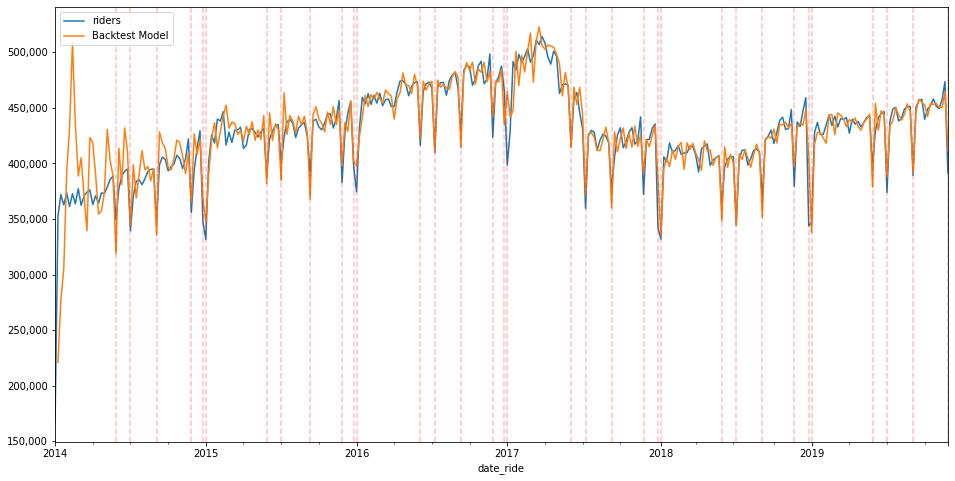

In [124]:
ts.plot_fit(train[series], backtest, train)

In [125]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [126]:
intervals

,Predictions,lower riders,upper riders
2019-12-08 00:00:00,"443,853","414,720","472,987"
2019-12-15 00:00:00,"450,585","410,504","490,666"
2019-12-22 00:00:00,"456,959","410,626","503,293"
2019-12-29 00:00:00,"398,583","346,604","450,562"
2020-01-05 00:00:00,"397,265","338,399","456,131"
2020-01-12 00:00:00,"445,398","380,015","510,780"
2020-01-19 00:00:00,"453,042","378,891","527,193"
2020-01-26 00:00:00,"400,552","319,519","481,584"
2020-02-02 00:00:00,"450,699","362,814","538,583"
2020-02-09 00:00:00,"447,505","352,329","542,681"


In [127]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

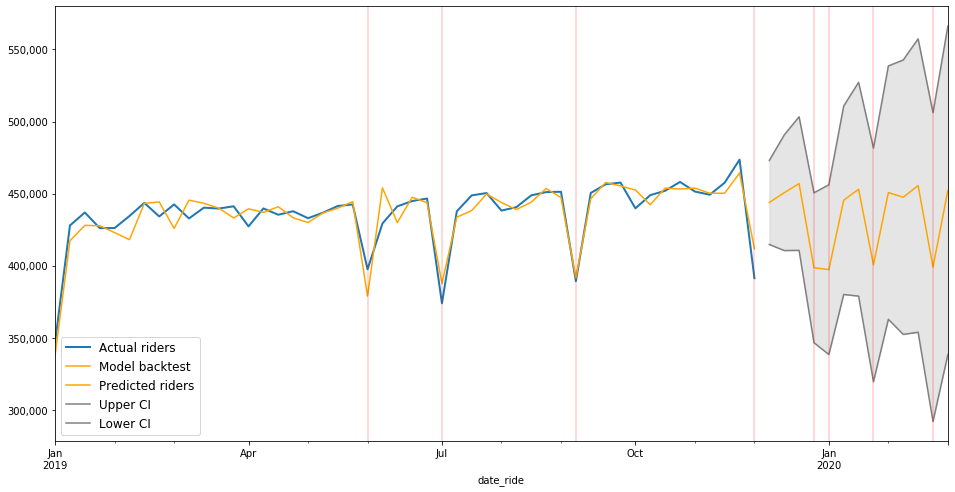

In [128]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [129]:
riders = ts.oos_weekly_df(model=model,
                          steps_ahead=horizon,
                          exog_data = oos_exog,
                          series = series,
                          add_date = False)

riders

,riders,lower_riders,upper_riders
2019-12-08,"443,853.21","414,719.57","472,986.85"
2019-12-15,"450,585.00","410,503.64","490,666.36"
2019-12-22,"456,959.46","410,626.10","503,292.81"
2019-12-29,"398,583.07","346,604.02","450,562.13"
2020-01-05,"397,265.18","338,399.17","456,131.18"
2020-01-12,"445,397.63","380,014.90","510,780.36"
2020-01-19,"453,041.92","378,890.51","527,193.34"
2020-01-26,"400,551.54","319,519.38","481,583.70"
2020-02-02,"450,698.64","362,813.82","538,583.45"
2020-02-09,"447,505.05","352,329.33","542,680.77"


# CPM

In [130]:
series = 'cpm'

In [131]:
model = ts.build_model(train[series],
                       p=2,
                       d=1,
                       q=0,
                       S=6,
                       exog_data = train['holiday'],
                       P=2,
                       D=1,
                       Q=0)

model.summary()

//anaconda3/envs/timeseries36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                               cpm   No. Observations:                  309
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 6)   Log Likelihood                 257.677
Date:                           Fri, 27 Dec 2019   AIC                           -503.354
Time:                                   15:20:34   BIC                           -481.091
Sample:                               01-05-2014   HQIC                          -494.446
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday        0.0478      0.016      2.935      0.003       0.016       0.080
ar.L1         -0.5494      0.017    -31.568      0.000      -0.584      -0.515
ar.L2         -0.3267      0.023    -14.186      0.000      -0.372      -0.282
ar.S.L6       -0.6513      0.022    -29.486      0.000      -0.695      -0.608
ar.S.L12      -0.3443      0.020    -16.855      0.000      -0.384      -0.304
sigma2         0.0105      0.000     31.352      0.000       0.010       0.011
===================================================================================
Ljung-Box (Q):                       71.96   Jarque-Bera (JB):             22440.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -2.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
ts.get_dw(model)

1.5085127875958533

In [133]:
backtest = ts.backtest_model(model,
                             train = train,
                             exog_data=train['holiday'][1:],
                             end = len(train)-1)

In [134]:
predictions = ts.make_predictions(model,
                               series + ' SARIMAX',
                               start=len(train),
                               end= len(train) + len(oos_exog)-1,
                               exog_data=oos_exog)

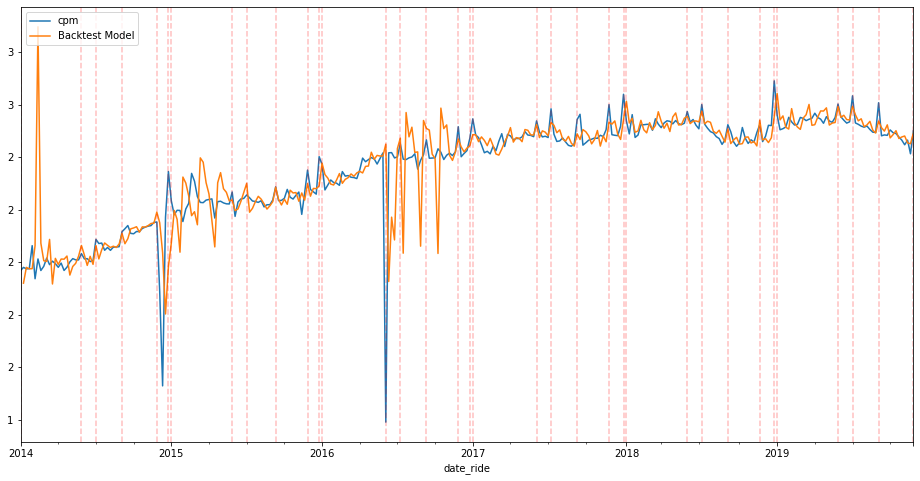

In [135]:
ts.plot_fit(train[series], backtest, train)

In [136]:
intervals = ts.get_oos_conf_interval(model=model,
                                     steps_ahead=horizon,
                                     exog_data = oos_exog)

In [137]:
intervals.format("{:,.2f}")

,Predictions,lower cpm,upper cpm
2019-12-08 00:00:00,2.43,2.22,2.63
2019-12-15 00:00:00,2.41,2.19,2.64
2019-12-22 00:00:00,2.41,2.17,2.64
2019-12-29 00:00:00,2.47,2.20,2.73
2020-01-05 00:00:00,2.44,2.15,2.73
2020-01-12 00:00:00,2.43,2.13,2.73
2020-01-19 00:00:00,2.39,2.04,2.74
2020-01-26 00:00:00,2.43,2.05,2.81
2020-02-02 00:00:00,2.37,1.97,2.78
2020-02-09 00:00:00,2.39,1.96,2.82


In [138]:
conf_df = ts.make_oos_plot_df(model=model,
                           steps_ahead=horizon,
                           exog_data = oos_exog)

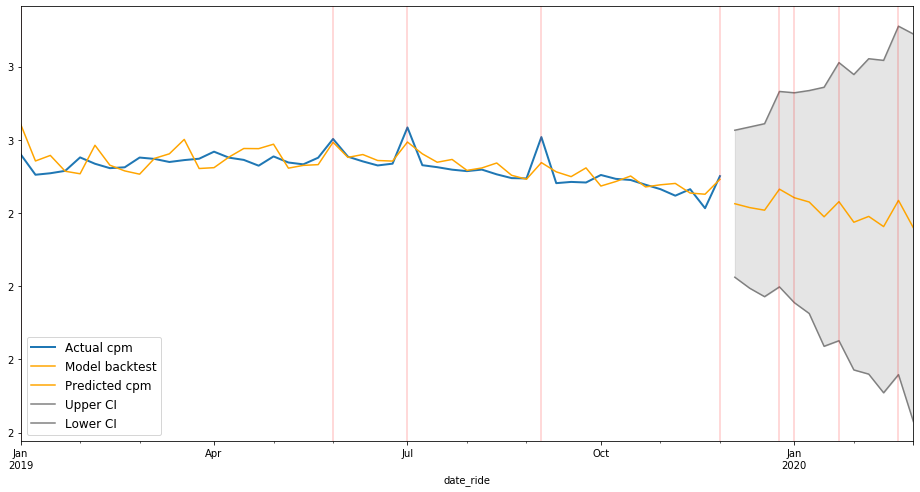

In [139]:
ts.plot_oos(conf_df, wdf, series, backtest, oos_exog, start_date='2019-01-01')

In [140]:
cpm = ts.oos_weekly_df(model=model,
                       steps_ahead=horizon,
                       exog_data = oos_exog,
                       series = series,
                       add_date = False)

cpm

,cpm,lower_cpm,upper_cpm
2019-12-08,2.43,2.22,2.63
2019-12-15,2.41,2.19,2.64
2019-12-22,2.41,2.17,2.64
2019-12-29,2.47,2.20,2.73
2020-01-05,2.44,2.15,2.73
2020-01-12,2.43,2.13,2.73
2020-01-19,2.39,2.04,2.74
2020-01-26,2.43,2.05,2.81
2020-02-02,2.37,1.97,2.78
2020-02-09,2.39,1.96,2.82


In [142]:
list_cols = list(wdf.columns)

# change holiday to holidays

list_cols[0] = 'holidays'

list_cols

['holidays',
 'gross_rides',
 'vp_rides',
 'vp_costs',
 'vp_miles',
 'vp_ambulatory_rides',
 'vp_ambulatory_costs',
 'vp_stretcher_rides',
 'vp_stretcher_costs',
 'vp_wheelchair_rides',
 'vp_wheelchair_costs',
 'riders',
 'cpm']

In [143]:
# make a list of dataframes using the columns
holidays = oos_exog

# create empty list
all_df = []

for df in list_cols:
    # use eval to handle the string name as actual df
    df = pd.DataFrame(eval(df))
    all_df.append(df)
    

all_df

[            holiday
 date               
 2019-12-08        0
 2019-12-15        0
 2019-12-22        0
 2019-12-29        1
 2020-01-05        1
 2020-01-12        0
 2020-01-19        0
 2020-01-26        1
 2020-02-02        0
 2020-02-09        0
 2020-02-16        0
 2020-02-23        1
 2020-03-01        0,
             gross_rides  lower_gross_rides  upper_gross_rides  fcast_date
 2019-12-08   915,647.63         854,741.04         976,554.23  2019-12-27
 2019-12-15   930,143.95         847,273.45       1,013,014.46  2019-12-27
 2019-12-22   942,693.68         847,587.46       1,037,799.90  2019-12-27
 2019-12-29   823,107.00         716,409.55         929,804.46  2019-12-27
 2020-01-05   820,935.01         699,702.83         942,167.19  2019-12-27
 2020-01-12   920,537.73         785,918.52       1,055,156.95  2019-12-27
 2020-01-19   935,910.44         783,627.93       1,088,192.95  2019-12-27
 2020-01-26   827,541.18         661,390.05         993,692.31  2019-12-27
 2020-02-

In [144]:
# concat them all into a single df
combined_wide = pd.concat(all_df, axis = 1)
combined_wide

,holiday,gross_rides,lower_gross_rides,upper_gross_rides,fcast_date,vp_rides,lower_vp_rides,upper_vp_rides,vp_costs,lower_vp_costs,upper_vp_costs,vp_miles,lower_vp_miles,upper_vp_miles,vp_ambulatory_rides,lower_vp_ambulatory_rides,upper_vp_ambulatory_rides,vp_ambulatory_costs,lower_vp_ambulatory_costs,upper_vp_ambulatory_costs,vp_stretcher_rides,lower_vp_stretcher_rides,upper_vp_stretcher_rides,vp_stretcher_costs,lower_vp_stretcher_costs,upper_vp_stretcher_costs,vp_wheelchair_rides,lower_vp_wheelchair_rides,upper_vp_wheelchair_rides,vp_wheelchair_costs,lower_vp_wheelchair_costs,upper_vp_wheelchair_costs,riders,lower_riders,upper_riders,cpm,lower_cpm,upper_cpm
2019-12-08,0,"915,647.63","854,741.04","976,554.23",2019-12-27,"564,649.73","500,542.20","628,757.27","14,641,410.60","12,933,555.85","16,349,265.35","6,086,570.83","4,798,179.06","7,374,962.60","756,486.42","703,155.61","809,817.23","12,170,602.98","10,798,218.26","13,542,987.70","15,836.35","14,827.33","16,845.37","1,029,276.48","862,720.46","1,195,832.51","142,811.28","133,807.34","151,815.21","2,743,945.62","2,325,110.05","3,162,781.19","443,853.21","414,719.57","472,986.85",2.43,2.22,2.63
2019-12-15,0,"930,143.95","847,273.45","1,013,014.46",2019-12-27,"548,871.59","483,463.55","614,279.63","14,625,359.86","12,685,525.07","16,565,194.65","6,048,590.97","4,616,332.93","7,480,849.01","776,426.19","701,152.68","851,699.69","11,865,266.92","10,466,502.30","13,264,031.53","15,910.65","14,513.28","17,308.01","1,006,647.73","809,361.81","1,203,933.65","142,960.00","129,342.40","156,577.61","2,725,622.87","2,229,060.04","3,222,185.69","450,585.00","410,503.64","490,666.36",2.41,2.19,2.64
2019-12-22,0,"942,693.68","847,587.46","1,037,799.90",2019-12-27,"544,434.28","478,003.58","610,864.99","14,658,655.56","12,507,370.12","16,809,941.01","5,835,618.35","4,310,370.61","7,360,866.08","779,214.29","690,490.94","867,937.65","11,714,207.00","10,294,303.61","13,134,110.39","16,037.79","14,431.32","17,644.26","947,308.14","730,488.01","1,164,128.27","142,926.54","126,862.27","158,990.82","2,649,245.32","2,100,352.09","3,198,138.54","456,959.46","410,626.10","503,292.81",2.41,2.17,2.64
2019-12-29,1,"823,107.00","716,409.55","929,804.46",2019-12-27,"409,040.41","341,802.29","476,278.53","10,895,826.95","8,558,141.47","13,233,512.43","4,397,111.61","2,789,185.10","6,005,038.13","659,943.13","556,769.39","763,116.87","8,880,452.57","7,443,549.78","10,317,355.37","14,438.14","12,571.14","16,305.15","712,831.12","469,890.36","955,771.88","130,697.72","112,732.15","148,663.29","1,986,928.97","1,371,737.02","2,602,120.92","398,583.07","346,604.02","450,562.13",2.47,2.20,2.73
2020-01-05,1,"820,935.01","699,702.83","942,167.19",2019-12-27,"355,076.06","287,198.55","422,953.56","10,852,240.68","8,354,983.56","13,349,497.80","3,651,889.06","1,966,042.70","5,337,735.43","657,011.95","531,934.56","782,089.35","7,643,885.00","6,193,273.97","9,094,496.02","14,415.30","12,270.00","16,560.59","619,122.37","354,056.24","884,188.50","132,002.79","112,200.49","151,805.10","1,918,712.81","1,247,372.17","2,590,053.45","397,265.18","338,399.17","456,131.18",2.44,2.15,2.73
2020-01-12,0,"920,537.73","785,918.52","1,055,156.95",2019-12-27,"557,333.99","477,311.37","637,356.60","14,451,597.66","11,802,307.74","17,100,887.58","5,569,285.74","3,572,472.76","7,566,098.72","770,739.49","625,363.11","916,115.87","12,015,344.43","10,316,948.69","13,713,740.17","16,010.85","13,599.39","18,422.30","877,818.51","573,940.48","1,181,696.54","143,351.75","121,815.70","164,887.81","2,066,723.65","1,345,771.52","2,787,675.79","445,397.63","380,014.90","510,780.36",2.43,2.13,2.73
2020-01-19,0,"935,910.44","783,627.93","1,088,192.95",2019-12-27,"539,803.30","458,506.56","621,100.04","14,568,157.72","11,746,892.39","17,389,423.05","5,373,027.14","3,229,274.80","7,516,779.48","770,429.41","609,583.41","931,275.42","11,663,856.56","9,939,029.49","13,388,683.63","16,096.57","13,470.05","18,723.09","851,162.26","519,105.29","1,183

In [145]:
# move the fcast_date for simplicity

fc = combined_wide['fcast_date']
combined_wide.drop(labels=['fcast_date'], axis=1,inplace = True)
combined_wide.insert(0, 'fcast_date', fc)

combined_wide.head()

,fcast_date,holiday,gross_rides,lower_gross_rides,upper_gross_rides,vp_rides,lower_vp_rides,upper_vp_rides,vp_costs,lower_vp_costs,upper_vp_costs,vp_miles,lower_vp_miles,upper_vp_miles,vp_ambulatory_rides,lower_vp_ambulatory_rides,upper_vp_ambulatory_rides,vp_ambulatory_costs,lower_vp_ambulatory_costs,upper_vp_ambulatory_costs,vp_stretcher_rides,lower_vp_stretcher_rides,upper_vp_stretcher_rides,vp_stretcher_costs,lower_vp_stretcher_costs,upper_vp_stretcher_costs,vp_wheelchair_rides,lower_vp_wheelchair_rides,upper_vp_wheelchair_rides,vp_wheelchair_costs,lower_vp_wheelchair_costs,upper_vp_wheelchair_costs,riders,lower_riders,upper_riders,cpm,lower_cpm,upper_cpm
2019-12-08,2019-12-27,0,"915,647.63","854,741.04","976,554.23","564,649.73","500,542.20","628,757.27","14,641,410.60","12,933,555.85","16,349,265.35","6,086,570.83","4,798,179.06","7,374,962.60","756,486.42","703,155.61","809,817.23","12,170,602.98","10,798,218.26","13,542,987.70","15,836.35","14,827.33","16,845.37","1,029,276.48","862,720.46","1,195,832.51","142,811.28","133,807.34","151,815.21","2,743,945.62","2,325,110.05","3,162,781.19","443,853.21","414,719.57","472,986.85",2.43,2.22,2.63
2019-12-15,2019-12-27,0,"930,143.95","847,273.45","1,013,014.46","548,871.59","483,463.55","614,279.63","14,625,359.86","12,685,525.07","16,565,194.65","6,048,590.97","4,616,332.93","7,480,849.01","776,426.19","701,152.68","851,699.69","11,865,266.92","10,466,502.30","13,264,031.53","15,910.65","14,513.28","17,308.01","1,006,647.73","809,361.81","1,203,933.65","142,960.00","129,342.40","156,577.61","2,725,622.87","2,229,060.04","3,222,185.69","450,585.00","410,503.64","490,666.36",2.41,2.19,2.64
2019-12-22,2019-12-27,0,"942,693.68","847,587.46","1,037,799.90","544,434.28","478,003.58","610,864.99","14,658,655.56","12,507,370.12","16,809,941.01","5,835,618.35","4,310,370.61","7,360,866.08","779,214.29","690,490.94","867,937.65","11,714,207.00","10,294,303.61","13,134,110.39","16,037.79","14,431.32","17,644.26","947,308.14","730,488.01","1,164,128.27","142,926.54","126,862.27","158,990.82","2,649,245.32","2,100,352.09","3,198,138.54","456,959.46","410,626.10","503,292.81",2.41,2.17,2.64
2019-12-29,2019-12-27,1,"823,107.00","716,409.55","929,804.46","409,040.41","341,802.29","476,278.53","10,895,826.95","8,558,141.47","13,233,512.43","4,397,111.61","2,789,185.10","6,005,038.13","659,943.13","556,769.39","763,116.87","8,880,452.57","7,443,549.78","10,317,355.37","14,438.14","12,571.14","16,305.15","712,831.12","469,890.36","955,771.88","130,697.72","112,732.15","148,663.29","1,986,928.97","1,371,737.02","2,602,120.92","398,583.07","346,604.02","450,562.13",2.47,2.20,2.73
2020-01-05,2019-12-27,1,"820,935.01","699,702.83","942,167.19","355,076.06","287,198.55","422,953.56","10,852,240.68","8,354,983.56","13,349,497.80","3,651,889.06","1,966,042.70","5,337,735.43","657,011.95","531,934.56","782,089.35","7,643,885.00","6,193,273.97","9,094,496.02","14,415.30","12,270.00","16,560.59","619,122.37","354,056.24","884,188.50","132,002.79","112,200.49","151,805.10","1,918,712.81","1,247,372.17","2,590,053.45","397,265.18","338,399.17","456,131.18",2.44,2.15,2.73


In [146]:
# reset the index

combined_wide.reset_index(inplace=True)
combined_wide.rename(columns = {'date':'month_ending'}, inplace = True)

combined_wide.rename(columns = {'index':'week_ending'}, inplace = True)

combined_wide.head()

,week_ending,fcast_date,holiday,gross_rides,lower_gross_rides,upper_gross_rides,vp_rides,lower_vp_rides,upper_vp_rides,vp_costs,lower_vp_costs,upper_vp_costs,vp_miles,lower_vp_miles,upper_vp_miles,vp_ambulatory_rides,lower_vp_ambulatory_rides,upper_vp_ambulatory_rides,vp_ambulatory_costs,lower_vp_ambulatory_costs,upper_vp_ambulatory_costs,vp_stretcher_rides,lower_vp_stretcher_rides,upper_vp_stretcher_rides,vp_stretcher_costs,lower_vp_stretcher_costs,upper_vp_stretcher_costs,vp_wheelchair_rides,lower_vp_wheelchair_rides,upper_vp_wheelchair_rides,vp_wheelchair_costs,lower_vp_wheelchair_costs,upper_vp_wheelchair_costs,riders,lower_riders,upper_riders,cpm,lower_cpm,upper_cpm
0,2019-12-08,2019-12-27,0,"915,647.63","854,741.04","976,554.23","564,649.73","500,542.20","628,757.27","14,641,410.60","12,933,555.85","16,349,265.35","6,086,570.83","4,798,179.06","7,374,962.60","756,486.42","703,155.61","809,817.23","12,170,602.98","10,798,218.26","13,542,987.70","15,836.35","14,827.33","16,845.37","1,029,276.48","862,720.46","1,195,832.51","142,811.28","133,807.34","151,815.21","2,743,945.62","2,325,110.05","3,162,781.19","443,853.21","414,719.57","472,986.85",2.43,2.22,2.63
1,2019-12-15,2019-12-27,0,"930,143.95","847,273.45","1,013,014.46","548,871.59","483,463.55","614,279.63","14,625,359.86","12,685,525.07","16,565,194.65","6,048,590.97","4,616,332.93","7,480,849.01","776,426.19","701,152.68","851,699.69","11,865,266.92","10,466,502.30","13,264,031.53","15,910.65","14,513.28","17,308.01","1,006,647.73","809,361.81","1,203,933.65","142,960.00","129,342.40","156,577.61","2,725,622.87","2,229,060.04","3,222,185.69","450,585.00","410,503.64","490,666.36",2.41,2.19,2.64
2,2019-12-22,2019-12-27,0,"942,693.68","847,587.46","1,037,799.90","544,434.28","478,003.58","610,864.99","14,658,655.56","12,507,370.12","16,809,941.01","5,835,618.35","4,310,370.61","7,360,866.08","779,214.29","690,490.94","867,937.65","11,714,207.00","10,294,303.61","13,134,110.39","16,037.79","14,431.32","17,644.26","947,308.14","730,488.01","1,164,128.27","142,926.54","126,862.27","158,990.82","2,649,245.32","2,100,352.09","3,198,138.54","456,959.46","410,626.10","503,292.81",2.41,2.17,2.64
3,2019-12-29,2019-12-27,1,"823,107.00","716,409.55","929,804.46","409,040.41","341,802.29","476,278.53","10,895,826.95","8,558,141.47","13,233,512.43","4,397,111.61","2,789,185.10","6,005,038.13","659,943.13","556,769.39","763,116.87","8,880,452.57","7,443,549.78","10,317,355.37","14,438.14","12,571.14","16,305.15","712,831.12","469,890.36","955,771.88","130,697.72","112,732.15","148,663.29","1,986,928.97","1,371,737.02","2,602,120.92","398,583.07","346,604.02","450,562.13",2.47,2.20,2.73
4,2020-01-05,2019-12-27,1,"820,935.01","699,702.83","942,167.19","355,076.06","287,198.55","422,953.56","10,852,240.68","8,354,983.56","13,349,497.80","3,651,889.06","1,966,042.70","5,337,735.43","657,011.95","531,934.56","782,089.35","7,643,885.00","6,193,273.97","9,094,496.02","14,415.30","12,270.00","16,560.59","619,122.37","354,056.24","884,188.50","132,002.79","112,200.49","151,805.10","1,918,712.81","1,247,372.17","2,590,053.45","397,265.18","338,399.17","456,131.18",2.44,2.15,2.73


In [147]:
wide_cols = list(combined_wide.columns)
wide_cols

['week_ending',
 'fcast_date',
 'holiday',
 'gross_rides',
 'lower_gross_rides',
 'upper_gross_rides',
 'vp_rides',
 'lower_vp_rides',
 'upper_vp_rides',
 'vp_costs',
 'lower_vp_costs',
 'upper_vp_costs',
 'vp_miles',
 'lower_vp_miles',
 'upper_vp_miles',
 'vp_ambulatory_rides',
 'lower_vp_ambulatory_rides',
 'upper_vp_ambulatory_rides',
 'vp_ambulatory_costs',
 'lower_vp_ambulatory_costs',
 'upper_vp_ambulatory_costs',
 'vp_stretcher_rides',
 'lower_vp_stretcher_rides',
 'upper_vp_stretcher_rides',
 'vp_stretcher_costs',
 'lower_vp_stretcher_costs',
 'upper_vp_stretcher_costs',
 'vp_wheelchair_rides',
 'lower_vp_wheelchair_rides',
 'upper_vp_wheelchair_rides',
 'vp_wheelchair_costs',
 'lower_vp_wheelchair_costs',
 'upper_vp_wheelchair_costs',
 'riders',
 'lower_riders',
 'upper_riders',
 'cpm',
 'lower_cpm',
 'upper_cpm']

In [148]:
# choose and id col and drop it from the list

id_vars = wide_cols[0:3]

value_vars = wide_cols[3:]


In [149]:
combined_long = pd.melt(combined_wide, id_vars = id_vars, value_vars = value_vars)

# rename the columns

combined_long.columns = ['month_ending', 'fcast_date', 'num_holidays', 'series', 'fcast_value']

combined_long.head()

,month_ending,fcast_date,num_holidays,series,fcast_value
0,2019-12-08,2019-12-27,0,gross_rides,"915,647.63"
1,2019-12-15,2019-12-27,0,gross_rides,"930,143.95"
2,2019-12-22,2019-12-27,0,gross_rides,"942,693.68"
3,2019-12-29,2019-12-27,1,gross_rides,"823,107.00"
4,2020-01-05,2019-12-27,1,gross_rides,"820,935.01"


In [151]:
dt_str = combined_long['fcast_date'][0].strftime("%m%d%Y")
dt_str

'12272019'

In [152]:
# write wide and long to .csv

combined_wide.to_csv('wide_ews_fcast_' + dt_str + '.csv', index = False)


combined_long.to_csv('long_ews_fcast_' + dt_str + '.csv', index = False)